In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# MNIST数据集

In [2]:
# 定义数据预处理：将 PIL Image 转为 Tensor， 并自动归一化到[0, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [3]:
# 加载训练集和测试集（首次运行会自动下载到 ./data/mnist）
# 由于没有书中附带库，这里自己实现加载数据集
train_dataset = datasets.MNIST(
    root='../data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='../data',
    train=False,
    download=True,
    transform=transform
)

In [4]:
# 提取数据至np.array
x_train = []
y_train = []
for img, label in train_dataset:
    x_train.append(img)
    y_train.append(label)

x_train = np.array(x_train)
x_train = x_train.reshape(x_train.shape[0], -1)
y_train = np.array(y_train)

In [5]:
print(x_train.shape)
print(y_train.shape)


(60000, 784)
(60000,)


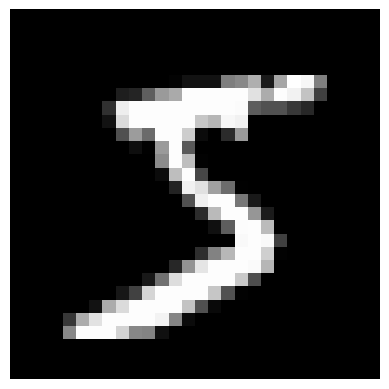

In [6]:
# 可视化图片示例
image = x_train[0]
image = image.reshape(28, 28)

plt.imshow(image, cmap='grey')
plt.axis('off')
plt.show()

# 神经网络的推理处理

In [7]:
def init_network():  # 这里直接随机
    network = {}

    # 第1层
    network['W1'] = np.random.randn(784, 50) * 0.01
    network['b1'] = np.zeros(50)

    # 第2层
    network['W2'] = np.random.randn(50, 100) * 0.01
    network['b2'] = np.zeros(100)

    # 第一层
    network['W3'] = np.random.randn(100, 10) * 0.01
    network['b3'] = np.zeros(10)

    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = a3

    return y

In [8]:
# 计算准确率

network = init_network()

y_pred = np.argmax(predict(network, x_train), axis=1)

accuracy = np.mean(y_pred == y_train)

print(f"准确率：{accuracy * 100:.2f}%")


准确率：9.93%


# 批处理

In [9]:
batch_size = 100

for i in range(0, x_train.shape[0], batch_size):
    x_batch = x_train[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]
    y_pred_batch = np.argmax(predict(network, x_batch), axis=1)
    accuracy = np.mean(y_pred_batch == y_batch)
    print(f"batch {i // batch_size} 准确率：{accuracy * 100:.2f}%")

batch 0 准确率：6.00%
batch 1 准确率：14.00%
batch 2 准确率：8.00%
batch 3 准确率：14.00%
batch 4 准确率：10.00%
batch 5 准确率：12.00%
batch 6 准确率：12.00%
batch 7 准确率：5.00%
batch 8 准确率：12.00%
batch 9 准确率：6.00%
batch 10 准确率：10.00%
batch 11 准确率：10.00%
batch 12 准确率：8.00%
batch 13 准确率：10.00%
batch 14 准确率：7.00%
batch 15 准确率：12.00%
batch 16 准确率：10.00%
batch 17 准确率：11.00%
batch 18 准确率：11.00%
batch 19 准确率：10.00%
batch 20 准确率：11.00%
batch 21 准确率：6.00%
batch 22 准确率：10.00%
batch 23 准确率：13.00%
batch 24 准确率：9.00%
batch 25 准确率：9.00%
batch 26 准确率：10.00%
batch 27 准确率：11.00%
batch 28 准确率：16.00%
batch 29 准确率：6.00%
batch 30 准确率：8.00%
batch 31 准确率：14.00%
batch 32 准确率：6.00%
batch 33 准确率：16.00%
batch 34 准确率：4.00%
batch 35 准确率：9.00%
batch 36 准确率：10.00%
batch 37 准确率：9.00%
batch 38 准确率：12.00%
batch 39 准确率：10.00%
batch 40 准确率：9.00%
batch 41 准确率：9.00%
batch 42 准确率：8.00%
batch 43 准确率：6.00%
batch 44 准确率：13.00%
batch 45 准确率：9.00%
batch 46 准确率：12.00%
batch 47 准确率：9.00%
batch 48 准确率：8.00%
batch 49 准确率：8.00%
batch 50 准确率：6.00%
batch 51 准确率：1